In [1]:
import jax
from jax.scipy.stats import norm
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

In [645]:
def f(x):
    return x + 0.4 * x ** 2 +  x ** 3

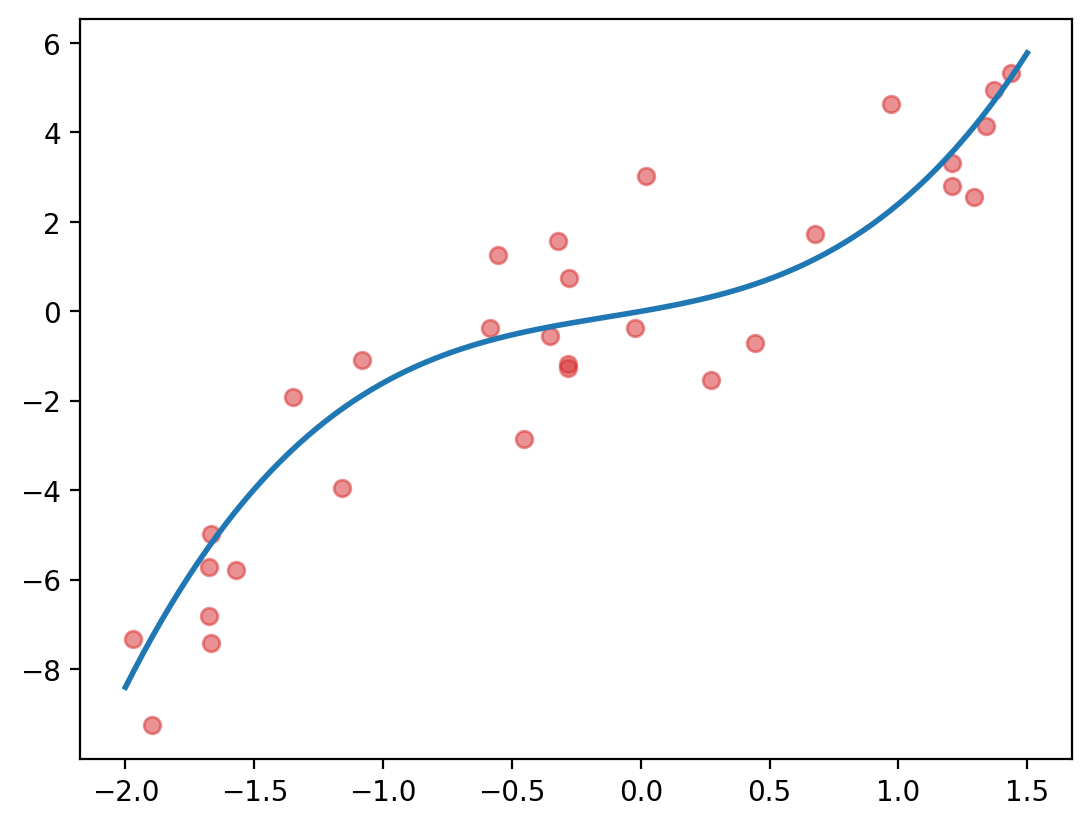

In [646]:
key = jax.random.PRNGKey(3141)
key_x, key_err = jax.random.split(key)

n = 30

vmin, vmax = -2, 1.5
x = jax.random.uniform(key_x, (n,), minval=vmin, maxval=vmax)
xtest = jnp.linspace(-2, 1.5, 100)
ytest = f(xtest)

err = jax.random.normal(key_err, (n,)) * 1.3
y = f(x) + err


plt.scatter(x, y, c="tab:red", alpha=0.5)
plt.plot(xtest, ytest, linewidth=2)

# plt.axis("off")

In [647]:
df = jax.grad(f)

In [648]:
x0 = -0.1
neval = 100
xline = jnp.linspace(-1, 1, neval) + x0

xtan = df(x0) * (xline - x0) + f(x0)
xperp = -(1 / df(x0)) * (xline - x0) + f(x0)

(-2.175, 1.675, -9.108749604225158, 6.4837500810623165)

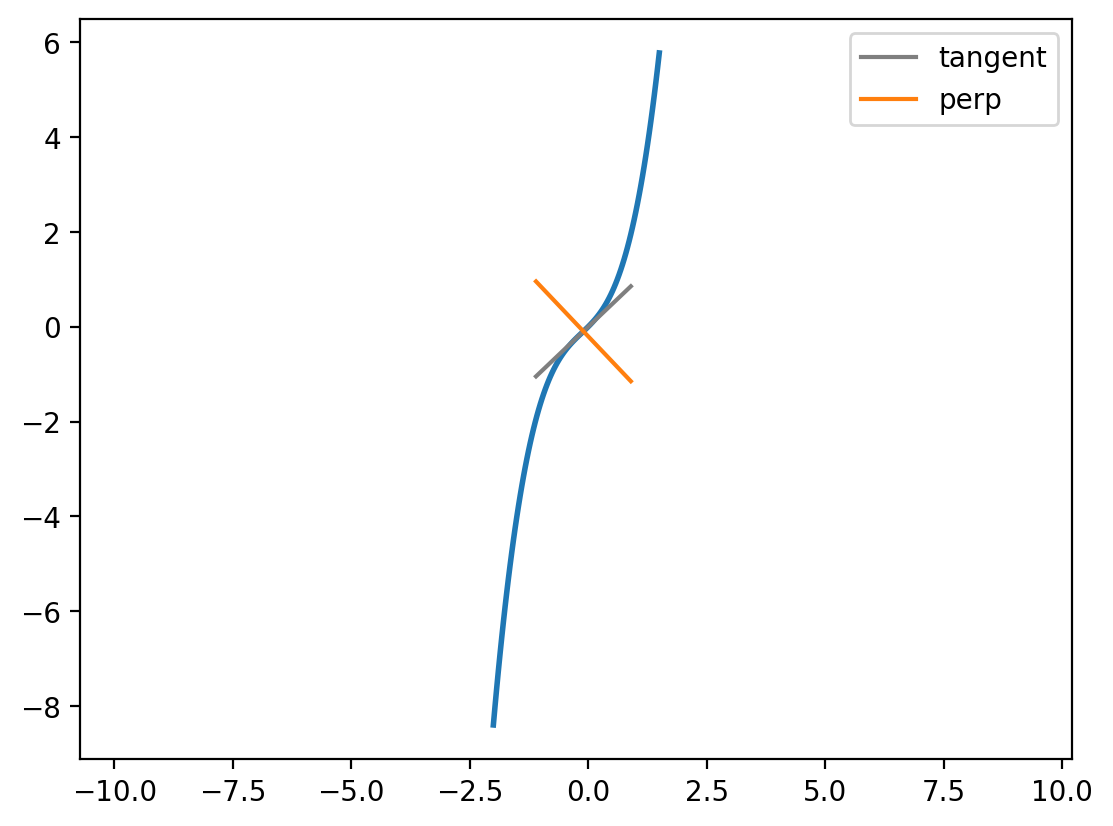

In [649]:
plt.plot(xtest, ytest, linewidth=2)
plt.plot(xline, xtan, c="tab:gray", label="tangent")
plt.plot(xline, xperp, c="tab:orange", label="perp")

plt.legend()
plt.axis("equal")

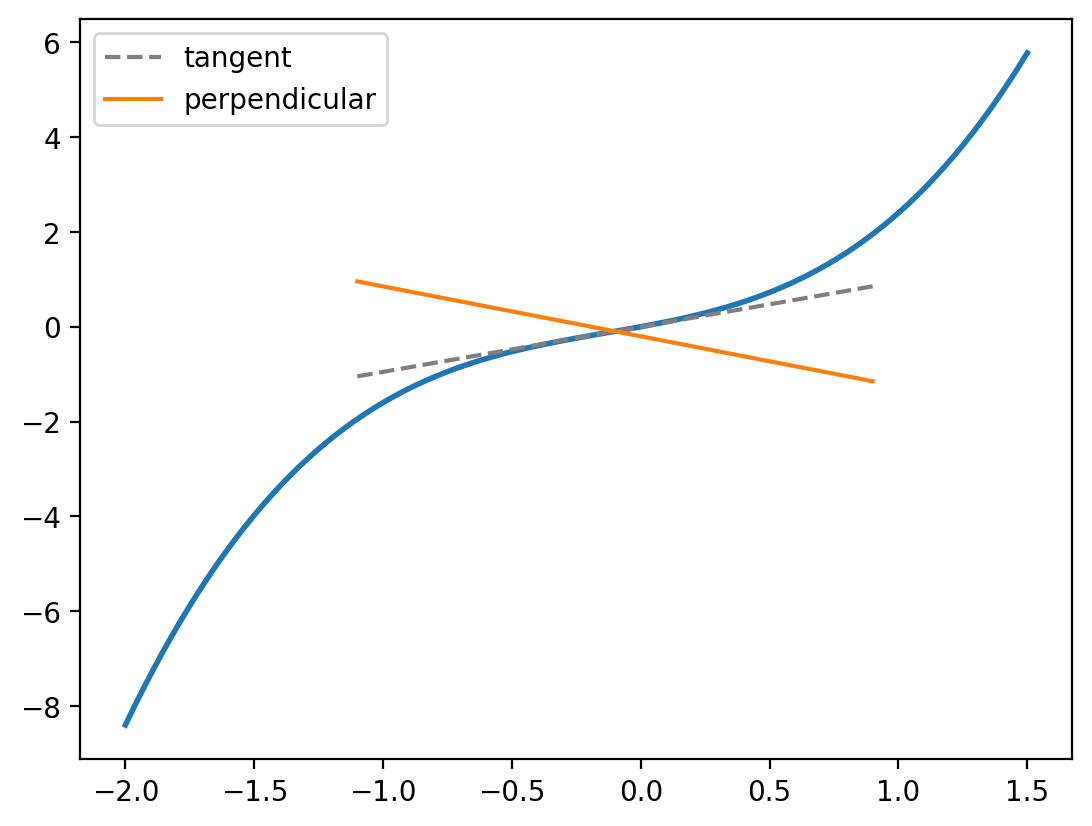

In [650]:
plt.plot(xtest, ytest, linewidth=2)
plt.plot(xline, xtan, c="tab:gray", label="tangent", linestyle="--")
plt.plot(xline, xperp, c="tab:orange", label="perpendicular")


plt.legend()

In [651]:
xpdf = jnp.linspace(-1, 1, neval)
ypdf = norm.pdf(xpdf, scale=0.1)
data = jnp.c_[xpdf, ypdf]

# rot = jnp.array([[0, 1], [-1, 0]])
# rot = rot @ rot @ rot
rot = jnp.eye(2)
xrot, yrot = jnp.einsum("ij,jk,nk->in", V, rot, data)

plt.plot(xtest, ytest, linewidth=2)
plt.plot(xtan, yrot + f(x0), c="tab:red")

plt.plot(xline, xtan, c="tab:gray", label="tangent", linestyle="--")
plt.plot(xline, xperp, c="tab:gray", label="perpendicular")

plt.legend()
plt.xlim(-2, 2)

NameError: name 'V' is not defined

## An animation 

In [652]:
from ipywidgets import FloatSlider, interact

In [653]:
def compute_rot_matrix(f, x0, vmin=-1, vmax=1):
    df = jax.grad(f)
    xvals = jnp.array([vmin, vmax])
    
    xtan = df(x0) * (xvals)
    xperp = -(1 / df(x0)) * (xvals)
    Vr = jnp.c_[xperp, xtan]# + f(x0)
#     Vre = jnp.linalg.eig(Vr)[1]
#     U, _, V = jnp.linalg.svd(Vr)
#     Vre = V @ U
    
    return Vr


In [654]:
R45 = jnp.array([[1, 1], [-1, 1]])
R90 = jnp.array([[0, -1], [1, 0]])
A = compute_rot_matrix(f, -0.1)

In [655]:
neval = 100

vmin, vmax = -1, 1
@interact(x0=FloatSlider(value=1.0, min=-2, max=2))
def plot_rot(x0):
    xline = jnp.linspace(vmin, vmax, neval) + x0
    
    xtan = df(x0) * (xline - x0) + f(x0)
    xperp = -(1 / df(x0)) * (xline - x0) + f(x0)
    
    scale = 0.3
    loc = x0
    ypdf = norm.pdf(xtan, loc=loc, scale=scale)
    data = jnp.c_[xpdf, ypdf] #  ypdf + f(x0)
    
    Vre = compute_rot_matrix(f, 0.0, vmin, vmax)

    xrot, yrot = jnp.einsum("ij,nj->in", Vre, data)
    
    plt.plot(xtest, ytest, linewidth=2)
    plt.plot(xtan, yrot + f(x0), c="tab:red")


    plt.plot(xline, xtan, c="tab:gray", label="tangent", linestyle="--")
    plt.plot(xline, xperp, c="tab:gray", label="perpendicular")
    

    plt.legend()
    plt.xlim(-2, 2)
    plt.ylim(-6, 6)
#     plt.axis("equal")

interactive(children=(FloatSlider(value=1.0, description='x0', max=2.0, min=-2.0), Output()), _dom_classes=('w…

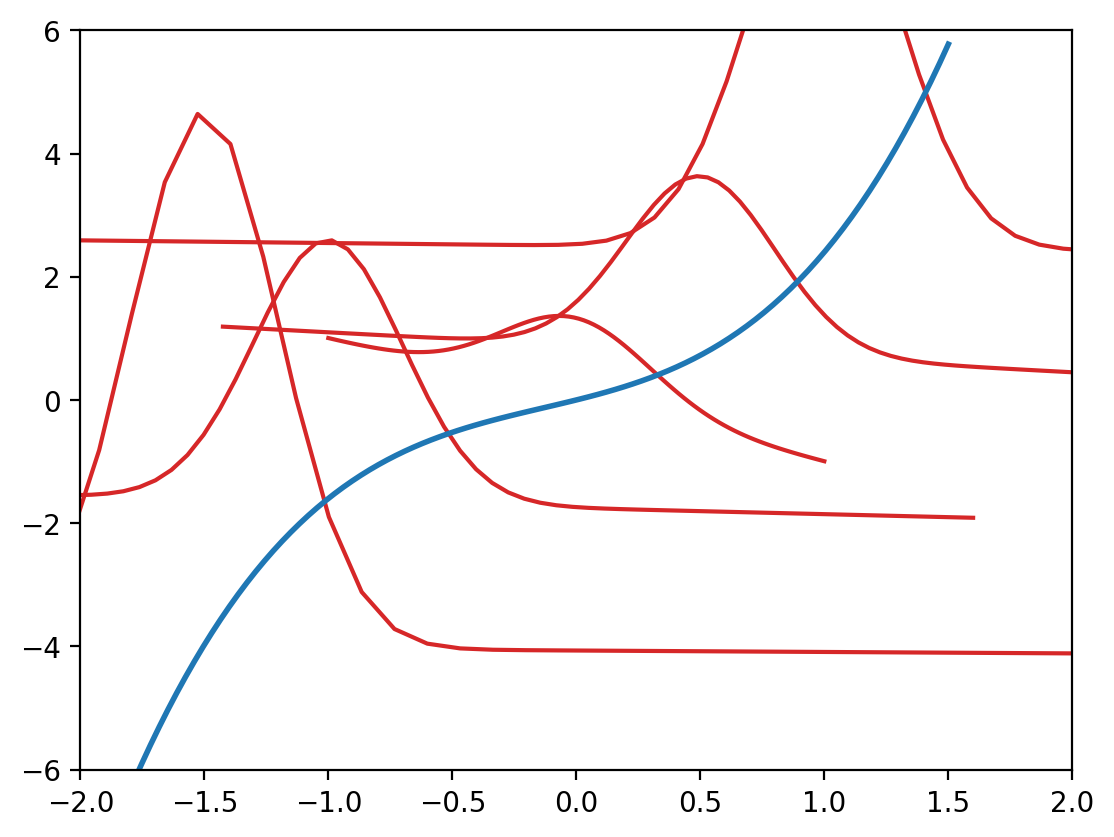

In [660]:
neval = 100

def plot_rot_multiple(xvals):
    
    
    for x0 in xvals:
        xline = jnp.linspace(-1, 1, neval) + x0

        xtan = df(x0) * (xline - x0) + f(x0)
        xperp = -(1 / df(x0)) * (xline - x0) + f(x0)

        scale = 0.3
        loc = x0
        ypdf = norm.pdf(xtan, loc=loc, scale=scale)
        data = jnp.c_[xpdf, ypdf] #  ypdf + f(x0)

        Vre = compute_rot_matrix(f, x0)

        xrot, yrot = jnp.einsum("ij,nj->in", Vre, data)
        plt.plot(xtan, yrot + f(x0), c="tab:red")
        
#         plt.plot(xline, xtan, c="tab:gray", label="tangent", linestyle="--", alpha=0.3)
#         plt.plot(xline, xperp, c="tab:gray", label="perpendicular", alpha=0.3)


    plt.plot(xtest, ytest, linewidth=2, c="tab:blue")
    

    plt.xlim(-2, 2)
    plt.ylim(-6, 6)
#     plt.axis("equal")


plot_rot_multiple(np.array([-1.5, -1.0, 0.0, 0.5, 1.0]))

## Fixing scale

In [657]:
df(x0) * (a - x0) + f(x0) = xmin
(a - x0) + f(x0) / df(x0) = xmin / df(x0)
a - x0 = xmin / df(x0) - f(x0) / df(x0)

a = xmin / df(x0) - f(x0) / df(x0) + x0
a = (xmin - f(x0)) / df(x0) + x0

SyntaxError: cannot assign to operator (3526676409.py, line 1)

In [553]:
neval = 100
xvals = jnp.array([-1, 1])

@interact(x0=FloatSlider(value=1.0, min=-2, max=2))
def plot_rot(x0):
    vmin = -2
    vmax = 2
    
    
    gline = jnp.linspace(vmin, vmax, neval)    
    gtan = df(x0) * (gline - x0) + f(x0)
    gperp = -(1 / df(x0)) * (gline - x0) + f(x0)

    
    xmin = (vmin - f(x0)) / df(x0) + x0
    xmax = (vmax - f(x0)) / df(x0) + x0
    
    xline = jnp.linspace(xmin, xmax, neval)
    
    xtan = df(x0) * (xline - x0) + f(x0)
    xperp = -(1 / df(x0)) * (xline - x0) + f(x0)
    
    scale = 0.3
    loc = x0
    ypdf = norm.pdf(xtan, loc=loc, scale=scale)
    data = jnp.c_[xpdf, ypdf] #  ypdf + f(x0)
    
    Vre = compute_rot_matrix(f, 0.0, xmin, xmax)

    xrot, yrot = jnp.einsum("ij,nj->in", Vre, data)
    
    plt.plot(xtest, ytest, linewidth=2)
    plt.plot(xtan, yrot + f(x0), c="tab:red")


    plt.plot(gline, gtan, c="tab:gray", label="tangent", linestyle="--")
    plt.plot(gline, gperp, c="tab:gray", label="perpendicular")
    

    plt.legend()
    plt.xlim(-2, 2)
    plt.ylim(-6, 6)
#     plt.axis("equal")

interactive(children=(FloatSlider(value=1.0, description='x0', max=2.0, min=-2.0), Output()), _dom_classes=('w…